<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Deep_Learning/lec02_in_class_exercise3_feature_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

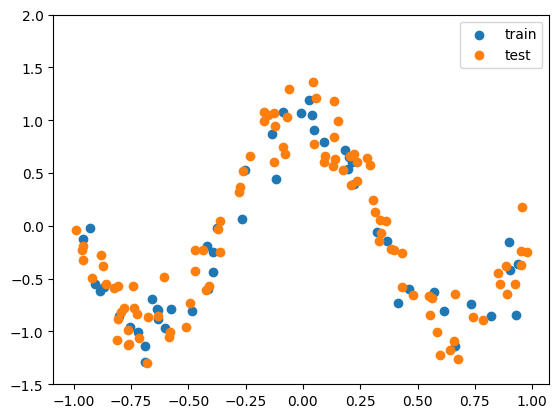

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 50
N_test = 2*N

np.random.seed(42)
x = 2.0*(np.random.rand(N)-0.5)
eps = (1/5)*np.random.randn(N)
y = np.cos((3/2)*np.pi*x) + eps

np.random.seed(0)
x_test = 2.0*(np.random.rand(N_test)-0.5)
eps_test = (1/5)*np.random.randn(N_test)
y_test = np.cos((3/2)*np.pi*x_test) + eps_test

plt.scatter(x,y, label='train')
plt.scatter(x_test,y_test, label = 'test')
plt.ylim([-1.5,2.0])
plt.legend()

# Live demo
Making a numpy array from a list of vectors.
Points along the unit circle.


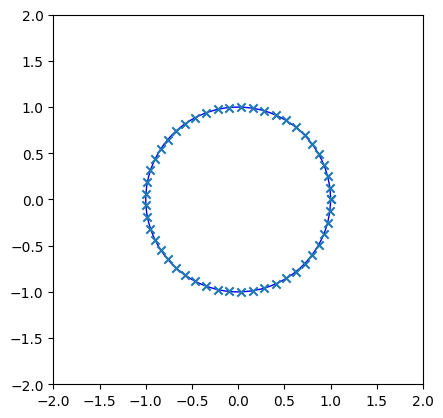

In [ ]:
import matplotlib.patches as patches

# YOUR CODE GOES HERE
#acts on a single example
def feature_map_inner(x):
    return np.array([np.cos(x), np.sin(x)])

#works on a batch of sample of feature_map(x):
def feature_map(x_array):
    return np.vstack([feature_map_inner(x) for x in x_array])

x = np.linspace(0, 2*np.pi)
x_tilde = feature_map(x)



plt.figure()
ax = plt.gca()
circle = patches.Circle((0, 0), radius=1, edgecolor='blue', fill=False, label='Unit Circle')


ax.add_patch(circle)
plt.xlim([-2,2])
plt.ylim([-2,2])
ax.set_aspect('equal', adjustable='box')

plt.scatter(x_tilde[:,0], x_tilde[:, 1], marker = 'x')

# Exercise 3.a

1. Make the polynomial feature map of degree `37`.
2. Create `Xtilde` and `Xtilde_test` matrices.

In [ ]:
# YOUR CODE GOES HERE
def polynomial_feature_map_inner(x,degree):
    pass
    # return Xtilde_single_row

def polynomial_feature_map(x_array,degree):
    pass
    # return Xtilde

deg = 37

Xtilde = polynomial_feature_map(x, deg)
Xtilde_test = polynomial_feature_map(x_test, deg)

# Make a "bad" guess for `w`


In [ ]:
w0 = np.ones(deg+1) # bad guess for w

x_grid = np.linspace(-1,1)
Xtilde_grid = polynomial_feature_map(x_grid,deg)

plt.plot(x_grid, Xtilde_grid@w0, color ='r')
plt.scatter(x,y)
plt.ylim([-1.5,2.0])

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

# Exercise 3.b
Compute `w_star`

In [ ]:
w_star = None # Define this


plt.plot(x_grid, Xtilde_grid@w_star, color ='r')
plt.scatter(x,y)
plt.ylim([-1.5,2.0])

In [ ]:
plt.plot(x_grid, Xtilde_grid@w_star, color ='r')
plt.scatter(x_test,y_test)
plt.ylim([-1.5,2.0])

# Exercise 3.c

Compute $\nabla_{\mathbf{w}} J(\mathbf{w})$

In [ ]:
step_size=1e-4

def dJdw(w):
  pass # delete this line
  # YOUR CODE GOES HERE

  # return grad_w


w1 = w0 - step_size*dJdw(w0)



plt.plot(x_grid, Xtilde_grid@w1, color ='r')
plt.scatter(x,y)
plt.ylim([-1.5,2.0])

In [ ]:
def J(w):
    return np.mean((y - Xtilde@w)**2)
def J_test(w):
    return np.mean((y_test - Xtilde_test@w)**2)


# Run for 10000 iterations

In [ ]:
w_list = [w0] # list of the w's

mse_list = [J(w0)]
mse_test_list = [J_test(w0)]

num_steps = 10000
step_size = 1e-1
for t in range(num_steps):
  w = w_list[-1]


  grad_w = dJdw(w)

  w_next = w - step_size * grad_w
  mse_list.append(J(w_next))
  mse_test_list.append(J_test(w_next))

  w_list.append(w_next)


w_final = w_list[-1]
plt.plot(x_grid, Xtilde_grid@w_final, color ='r')
plt.scatter(x,y)
plt.ylim([-1.5,2.0])

# What do you observe?

In [ ]:
plt.semilogx(mse_list,label='train MSE (w_t)')
plt.semilogx(mse_test_list,label='test MSE (w_t)')
plt.axhline(J(w_star), linestyle=":", label = 'train MSE (w_star)')
plt.axhline(J_test(w_star), linestyle="-.", label = 'test MSE (w_star)')

plt.legend()